In [1]:
import numpy as n
import pylab as pl
import os,h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
%matplotlib inline

/Users/wiltbemj/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
os.chdir('/Users/wiltbemj/Dropbox/Python/MHDpy/')
import MHDpy

In [10]:
outdir = '/Users/wiltbemj/Downloads/MHDpy/'
outbase ='gem'
step = 9951
hdf5Name = os.path.join(outdir,'%s-%06d.hdf5'%(outbase,step))
hdf5file = h5py.File(hdf5Name,'r')

In [11]:
Time = hdf5file.attrs['time']
NO = hdf5file.attrs['NO']
NO2 = NO/2

In [12]:
x = hdf5file["X"]
y = hdf5file["Y"]
z = hdf5file["Z"]

In [13]:
(xc,yc,zc,xi,yi,zi,xj,yj,zj,xk,yk,zk,dx,dy,dz)=MHDpy.Metrics(x,y,z,NO)

In [14]:
rho = hdf5file['Rho']
p = hdf5file['P']
vx = hdf5file['Vx']
vy = hdf5file['Vy']
vz = hdf5file['Vz']
bx = hdf5file['Bx']
by = hdf5file['By']
bz = hdf5file['Bz']
bi = hdf5file['Bi']
bj = hdf5file['Bj']
bk = hdf5file['Bk']
Ei = hdf5file['Ei']
Ej = hdf5file['Ej']
Ek = hdf5file['Ek']

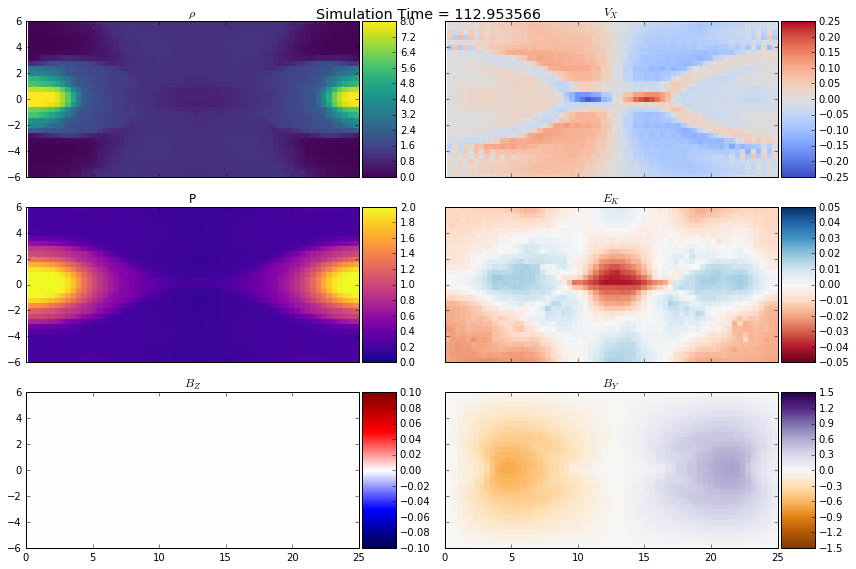

In [27]:
k=4
golden_mean = (n.sqrt(5)-1.0)/2.0
figwidth = 12
figheight = 8
fig,ax=pl.subplots(nrows=3,ncols=2,figsize=(figwidth,figheight),sharex=True,sharey=True)

levels = n.linspace(0,2,12)
cf0 = ax[0,0].pcolor(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    rho[NO2:-NO2,NO2:-NO2,k],vmin=0,vmax=8,
                    cmap=pl.get_cmap('viridis'))
divider0 = make_axes_locatable(ax[0,0])
cax0 = divider0.append_axes("right", size="10%", pad=0.05)
cbar0 = pl.colorbar(cf0,cax=cax0)
ax[0,0].set_title(r'$\rho$')
ax[0,0].set_xlim((0,25))
ax[0,0].set_ylim((-6,6))

levels = n.linspace(-1.0,1.0,13)
cf1 = ax[0,1].pcolor(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    vx[NO2:-NO2,NO2:-NO2,k],vmin=-2.5e-1,vmax=2.5e-1,
                    cmap=pl.get_cmap('coolwarm'))
divider1 = make_axes_locatable(ax[0,1])
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
cbar1 = pl.colorbar(cf1,cax=cax1)
ax[0,1].set_title(r'$V_X$')

levels = n.linspace(0.0,2.0,13)
cf2 = ax[1,0].pcolor(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    p[NO2:-NO2,NO2:-NO2,k],vmin=0,vmax=2.0,
                    cmap=pl.get_cmap('plasma'))
divider2 = make_axes_locatable(ax[1,0])
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
cbar2 = pl.colorbar(cf2,cax=cax2)
ax[1,0].set_title('P')

levels = n.linspace(-0.15,0.15,13)
cf3 = ax[1,1].pcolor(x[NO2:-NO2,NO2:-NO2,k],y[NO2:-NO2,NO2:-NO2,k],
                    Ek[:,:,0],vmin=-5.0e-2,vmax=5.0e-2,
                    cmap=pl.get_cmap('RdBu'))
divider3 = make_axes_locatable(ax[1,1])
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
cbar3 = pl.colorbar(cf3,cax=cax3)
ax[1,1].set_title(r'$E_K$')


levels = n.linspace(-1.0,1.0,13)
cf4 = ax[2,0].pcolor(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    bz[NO2:-NO2,NO2:-NO2,k],vmin=-0.1,vmax=0.1,
                    cmap=pl.get_cmap('seismic'))
divider4 = make_axes_locatable(ax[2,0])
cax4 = divider4.append_axes("right", size="10%", pad=0.05)
cbar4 = pl.colorbar(cf4,cax=cax4)
ax[2,0].set_title(r'$B_Z$')

levels = n.linspace(-1.0e-13,1.0e-13,13)
cf5 = ax[2,1].pcolor(xc[NO2:-NO2,NO2:-NO2,k],yc[NO2:-NO2,NO2:-NO2,k],
                    by[NO2:-NO2,NO2:-NO2,k],vmin=-1.5,vmax=1.5,
                    cmap=pl.get_cmap('PuOr'))
divider5 = make_axes_locatable(ax[2,1])
cax5 = divider5.append_axes("right", size="10%", pad=0.05)
cbar5 = pl.colorbar(cf5,cax=cax5)
ax[2,1].set_title(r'$B_Y$')


fig.suptitle('Simulation Time = %f' % Time,fontsize='x-large')
pl.tight_layout()

In [30]:
n.max(bz)

0.0